# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [100]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [101]:
pd.read_csv('../Data/maven_music_customers.csv', header = None)

,0,1,2,3,4,5,6,7
0,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
2,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
3,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
4,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
5,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
6,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
7,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),$9.99,NaN,NaN
8,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),$9.99,NaN,6/2/23
9,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),$9.99,NaN,NaN


In [2]:
# Read in the customer data and listening history
customers = pd.read_csv('../Data/maven_music_customers.csv')
listening_history = pd.read_excel('../Data/maven_music_listening_history.xlsx') 

In [3]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [4]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [5]:
# Hint: Where might you find listening history data beyond the ID's?
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [6]:
# Read in the audio data
audio_data = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name ='audio_files')

In [7]:
# Read in the session data
session_data = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name ='session_login_time')

In [8]:
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [9]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [10]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [11]:
# Check the data types
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [12]:
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [13]:
customers.Email = customers.Email.str.replace('Email: ','')
customers['Member Since'] = pd.to_datetime(customers['Member Since'])
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])

#removing $ from subscription Rate

customers['Subscription Rate'] = customers['Subscription Rate'].str.replace('$','')
customers['Subscription Rate'] = customers ['Subscription Rate'].astype(float)

C:\Users\Yumna\AppData\Local\Temp\ipykernel_10712\668688857.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since'] = pd.to_datetime(customers['Member Since'])
C:\Users\Yumna\AppData\Local\Temp\ipykernel_10712\668688857.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])


In [14]:
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [15]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [16]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [17]:
audio_data.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [18]:
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [19]:
session_data.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [20]:
# Look for NaN values in the data
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [21]:
customers['Discount?'].value_counts(dropna=False)

Discount?
NaN    23
Yes     7
Name: count, dtype: int64

In [22]:
customers['Discount?'] = np.where(customers['Discount?'].isna(), 0 , customers['Discount?'])

In [23]:
customers['Discount?'] = np.where(customers['Discount?'].str.lower() == 'yes', 1 , customers['Discount?'])

In [24]:
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,NaN,2.99,0,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,NaN,2.99,0,2023-06-01
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,0,NaT
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,NaN,2.99,0,2023-06-03
11,5827,Rhythm Franklin,rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,0,NaT


In [25]:
customers[customers['Cancellation Date'].isna() == False]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,NaN,2.99,0,2023-06-01
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,NaN,2.99,0,2023-06-03
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01


In [26]:
customers['Subscription Plan'].value_counts(dropna=False)

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
NaN                  5
Name: count, dtype: int64

In [27]:
customers['Subscription Plan'] = customers['Subscription Plan'].fillna('Basic (Ads)')

In [28]:
customers[customers['Cancellation Date'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
10,5826,Chord Hayes,harmonic.chord@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
11,5827,Rhythm Franklin,rhythmic.franklin@email.edu,2023-03-28,Basic (Ads),2.99,0,NaT
14,6163,Melody Parks,park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT


In [29]:
customers['Subscription Rate'].value_counts()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [30]:
customers['Subscription Rate'] = np.where(customers['Subscription Rate']== 99.99, 9.99, customers['Subscription Rate'])

In [31]:
listening_history.isna().sum()

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [32]:
audio_data.isna().sum()

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [33]:
session_data.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

#### ii. Inconsistent Text & Typos

In [34]:
# Look for inconsistent text & typos
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [35]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [36]:
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [37]:
audio_data['Genre'].value_counts()


Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [38]:
audio_data['Genre'] = np.where(audio_data['Genre'] == 'Pop Music', 'Pop', audio_data['Genre'])

In [39]:
audio_data.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [40]:
audio_data['ID'] = audio_data['ID'].str.replace('Song-','')
audio_data['ID'] = audio_data['ID'].str.replace('Podcast-','')

In [41]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


#### iii. Duplicate Rows

In [42]:
# Look for duplicate rows
customers.duplicated().sum()

0

In [43]:
listening_history.duplicated().sum()

0

In [44]:
session_data.duplicated().sum()

0

In [45]:
audio_data.duplicated().sum()

0

#### iv. Outliers

In [46]:
# Look for outliers


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


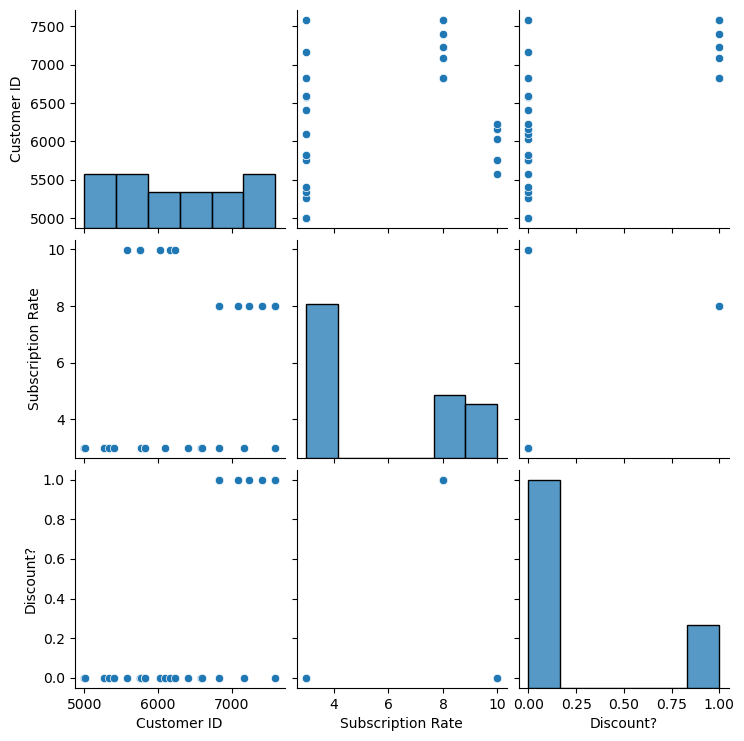

In [47]:
sns.pairplot(customers)

In [48]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,NaN


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


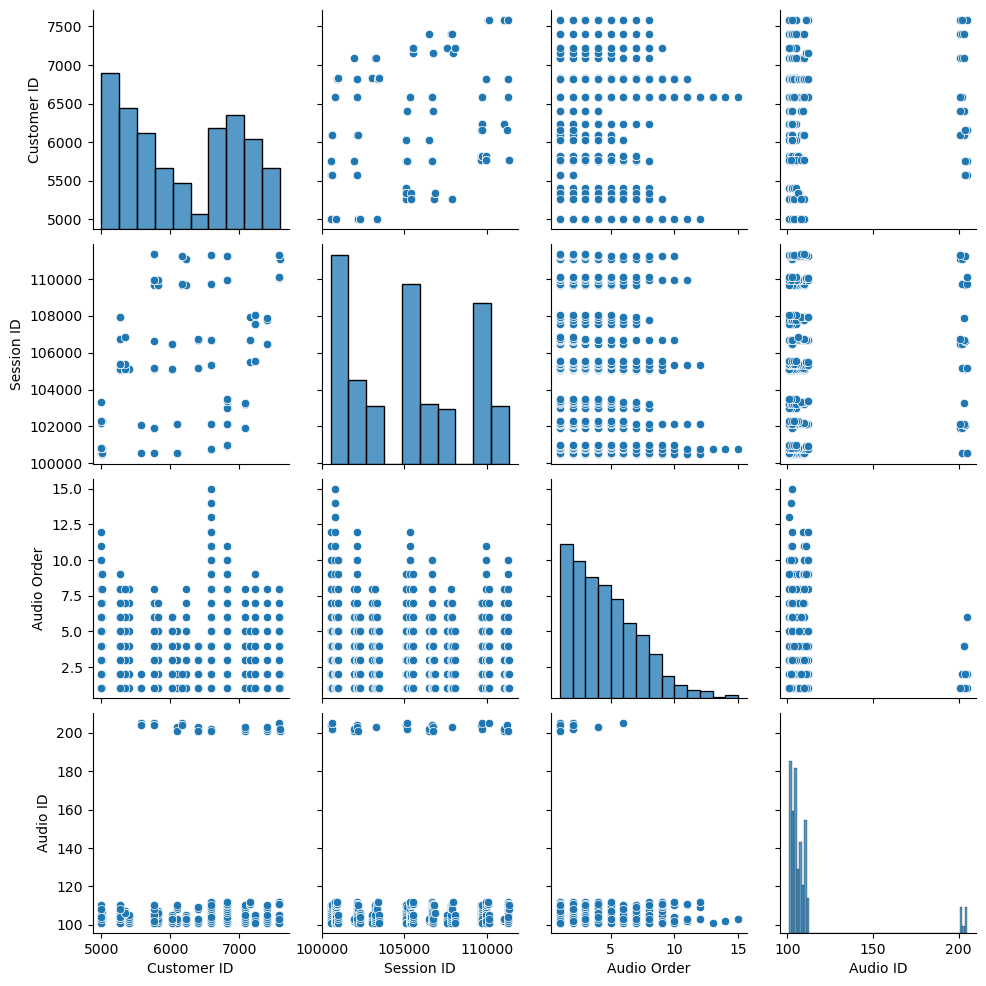

In [49]:
sns.pairplot(listening_history)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


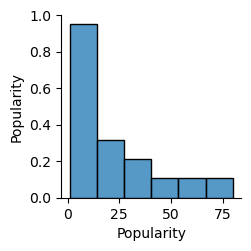

In [50]:
sns.pairplot(audio_data)

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [51]:
# Create a 'Cancelled' column
customers['Cancelled'] = np.where(customers['Cancellation Date'].isna(), 0, 1)

## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [52]:
# How long were customers members before they cancelled?
cancelled = customers[customers['Cancelled'] == 1]

In [53]:
# Cancellation rate for those who had a discount
cancelled['days_to_cancelation'] = (cancelled['Cancellation Date'] - cancelled['Member Since']).dt.days

C:\Users\Yumna\AppData\Local\Temp\ipykernel_10712\164289307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['days_to_cancelation'] = (cancelled['Cancellation Date'] - cancelled['Member Since']).dt.days


<Axes: xlabel='days_to_cancelation', ylabel='Count'>

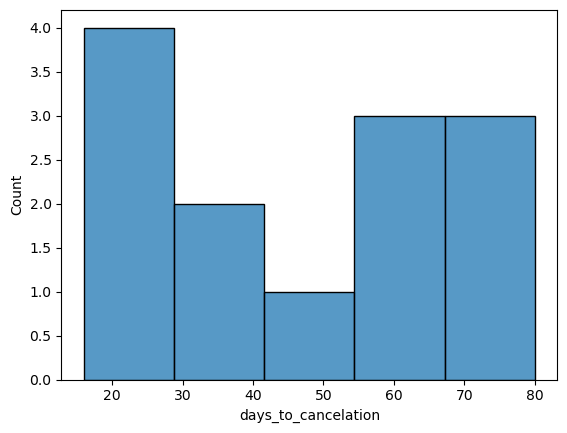

In [54]:
# Cancellation rate for those who did not have a discount
sns.histplot(cancelled['days_to_cancelation'])

In [55]:
# Visualize the cancellation rate for those with a discount vs those without a discount
cancelled

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,days_to_cancelation
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,80
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1,75
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1,72
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1,65
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1,61
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1,57
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1,46
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,32
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,32
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1,24


In [56]:
# Visualize the cancellation rate for those with a discount vs those without a discount

customers['Discount?'].value_counts().reset_index()

,Discount?,count
0,0,23
1,1,7


In [57]:
customers.groupby('Discount?')['Cancelled'].sum().reset_index()

,Discount?,Cancelled
0,0,7
1,1,6


In [58]:
cancelled_agg = pd.merge(customers['Discount?'].value_counts().reset_index(), customers.groupby('Discount?')['Cancelled'].sum().reset_index())

In [59]:
cancelled_agg['cancelled_perc'] = 100* cancelled_agg['Cancelled']/cancelled_agg['count']

<Axes: xlabel='Discount?', ylabel='cancelled_perc'>

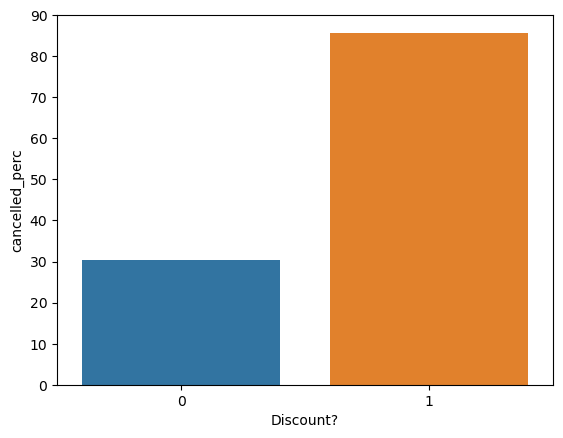

In [60]:
sns.barplot(data =cancelled_agg, x= 'Discount?', y='cancelled_perc' )

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [61]:
# Split the ID in the audio data so the column can be joined with other tables
audio_data.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [62]:
audio_data['ID'] = audio_data['ID'].astype(int)

In [63]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [64]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [65]:
#joined_history
joinedh = pd.merge(listening_history, audio_data, left_on = 'Audio ID', right_on = 'ID', how = 'left')

In [66]:
joinedh.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52


In [67]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [68]:
# Hint: Check the data type of Audio ID in the audio table
joined_history = pd.merge(joinedh, session_data, how = 'left')

In [69]:
joined_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5,2023-03-13 18:29:00
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10,2023-03-13 18:29:00
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52,2023-03-13 18:29:00


<Axes: ylabel='Frequency'>

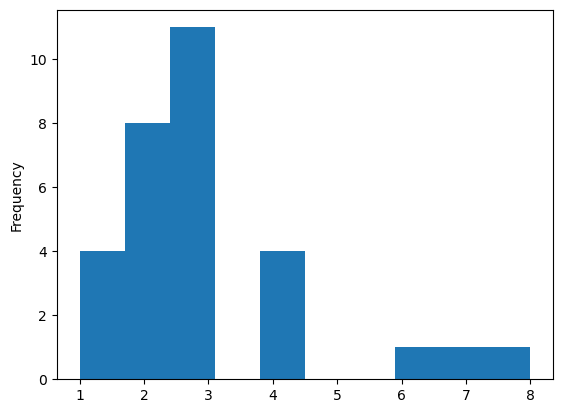

In [70]:
# The number of listening sessions that each customer had in the past 3 months
joined_history.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [71]:
joined_history['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [72]:
# Create a dataframe ready for modeling
joined_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5,2023-03-13 18:29:00
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10,2023-03-13 18:29:00
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52,2023-03-13 18:29:00


In [73]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [74]:
df = customers[["Customer ID", "Cancelled",'Discount?']]

In [75]:
df.columns = ['Customer ID','Cancelled', 'Discount']

In [76]:
df = df.groupby('Customer ID')[['Cancelled', 'Discount']].sum().reset_index()

In [77]:
# Calculate the number of listening sessions for each customer
sessions_per_customer = listening_history.groupby('Customer ID')['Session ID'].nunique().reset_index()

In [78]:
sessions_per_customer.columns= ['Customer ID','Total Sessions']
sessions_per_customer.head()

,Customer ID,Total Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [79]:
df = pd.merge(df, sessions_per_customer, on='Customer ID', how='left')

In [80]:
df.head()

,Customer ID,Cancelled,Discount,Total Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [81]:
joined_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5,2023-03-13 18:29:00
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10,2023-03-13 18:29:00
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52,2023-03-13 18:29:00


In [111]:
pd.concat([joined_history, pd.get_dummies(joined_history['Audio Type']).astype(int)], axis=1)[['Customer ID','Podcast','Song']]

,Customer ID,Podcast,Song
0,5001,0,1
1,5001,0,1
2,5001,0,1
3,5001,0,1
4,5001,0,1
...,...,...,...
500,7579,0,1
501,6588,1,0
502,5763,0,1
503,5763,0,1


In [83]:
audios_agg = audio_category.groupby('Customer ID')[['Podcast','Song']].sum().reset_index()

In [84]:
df = pd.merge(df, audios_agg, how='left').reset_index(drop = True)

In [85]:
df

,Customer ID,Cancelled,Discount,Total Sessions,Podcast,Song
0,5001,0,0,8,0,60
1,5002,0,0,4,0,22
2,5004,1,0,1,0,9
3,5267,0,0,7,0,45
4,5338,0,0,4,0,18
5,5404,1,0,1,0,8
6,5581,0,0,3,5,0
7,5759,1,0,2,0,15
8,5761,0,0,3,5,0
9,5763,0,0,6,0,31


In [86]:
# Percent pop
joined_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Session Log In Time
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5,2023-03-13 18:29:00
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10,2023-03-13 18:29:00
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52,2023-03-13 18:29:00


In [87]:
joined_history['Pop'] = np.where(joined_history['Genre']=='Pop', 1, 0)

In [88]:
pop_songs = joined_history.groupby('Customer ID')['Pop'].sum().reset_index()

In [89]:
pop_songs.columns=['Customer ID','Pop Songs']

In [90]:
df = pd.merge(df, pop_songs, how='left')

In [91]:
total_audios = joined_history.groupby('Customer ID')['Audio ID'].count().reset_index()

In [92]:
total_audios.columns=['Customer ID','Total Audios']

In [93]:
df = pd.merge(df, total_audios, how='left')

In [94]:
df['perc_podcasts'] = (100*df['Podcast']/df['Total Audios']).round(2)

In [95]:
df['perc_popsongs'] = (100*df['Pop Songs']/df['Total Audios']).round(2)

In [96]:
df

,Customer ID,Cancelled,Discount,Total Sessions,Podcast,Song,Pop Songs,Total Audios,perc_podcasts,perc_popsongs
0,5001,0,0,8,0,60,34,60,0.00,56.67
1,5002,0,0,4,0,22,0,22,0.00,0.00
2,5004,1,0,1,0,9,9,9,0.00,100.00
3,5267,0,0,7,0,45,23,45,0.00,51.11
4,5338,0,0,4,0,18,0,18,0.00,0.00
5,5404,1,0,1,0,8,8,8,0.00,100.00
6,5581,0,0,3,5,0,0,5,100.00,0.00
7,5759,1,0,2,0,15,15,15,0.00,100.00
8,5761,0,0,3,5,0,0,5,100.00,0.00
9,5763,0,0,6,0,31,20,31,0.00,64.52


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


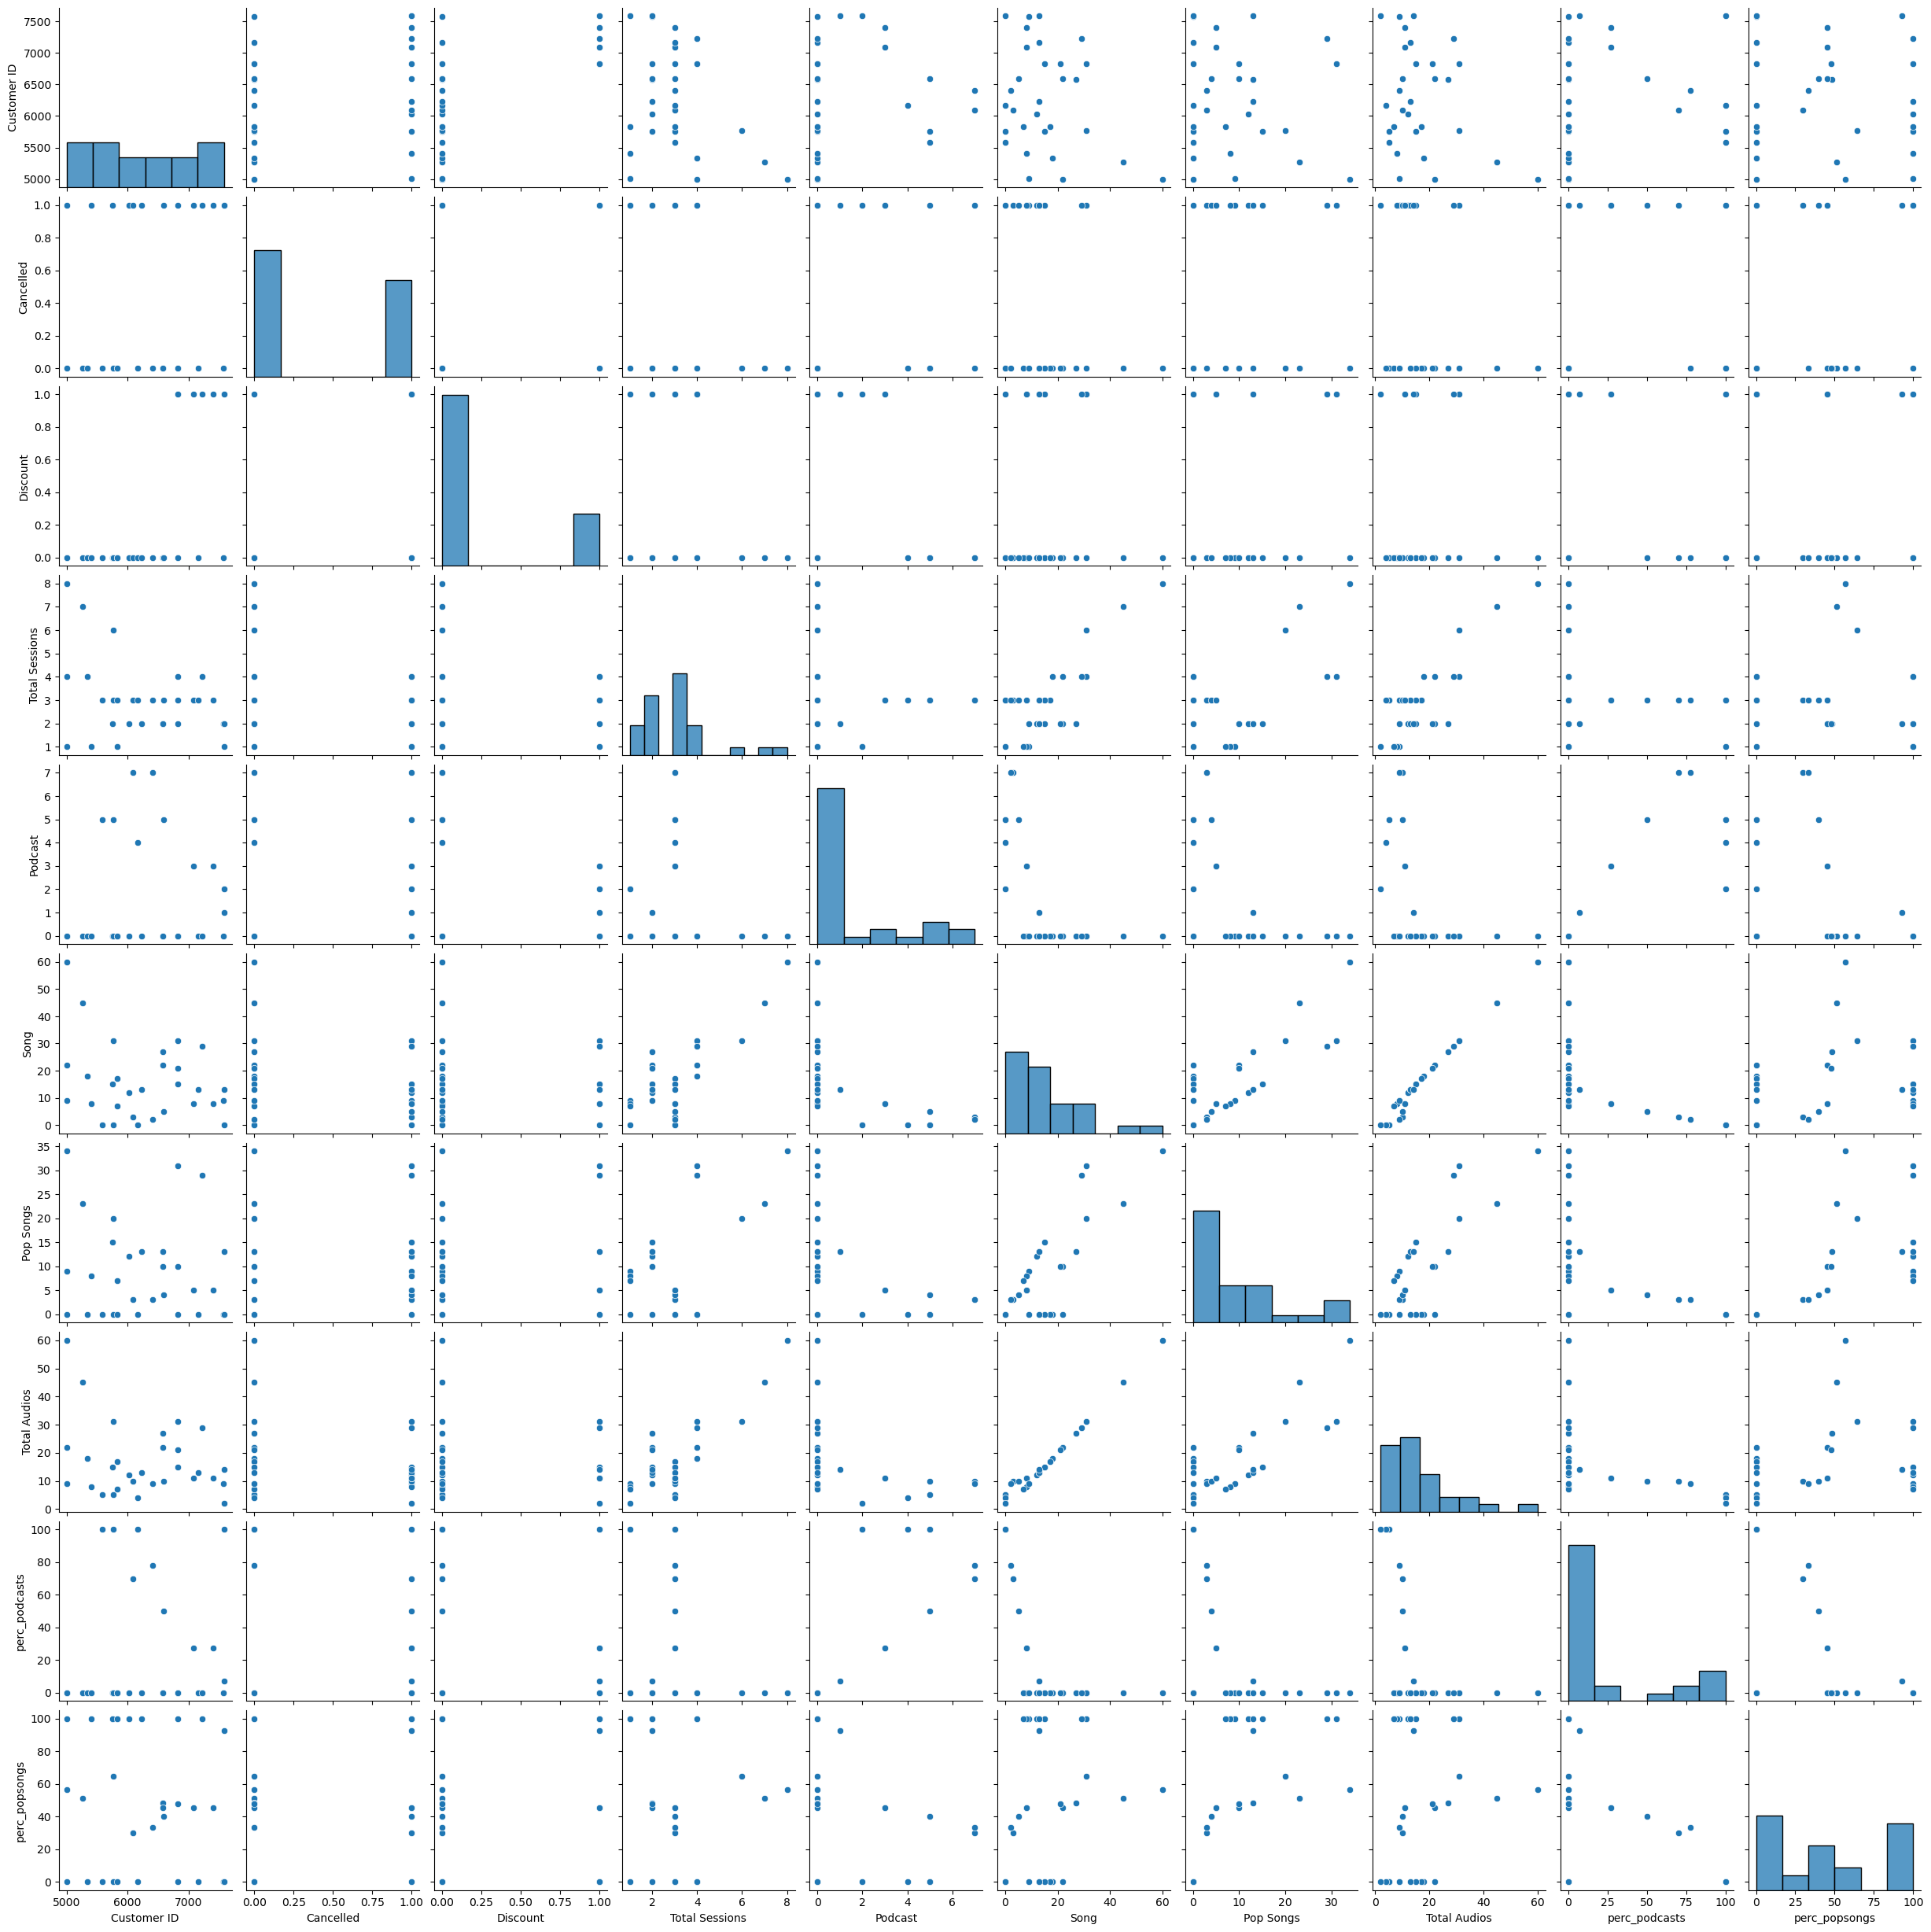

In [97]:
sns.pairplot(df)

In [98]:
df.corr()

,Customer ID,Cancelled,Discount,Total Sessions,Podcast,Song,Pop Songs,Total Audios,perc_podcasts,perc_popsongs
Customer ID,1.000000,0.269942,0.648514,-0.337083,0.080942,-0.267463,-0.106684,-0.277598,0.082874,-0.076140
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.083348,-0.230934,0.215461,-0.237237,-0.007481,0.585620
Discount,0.648514,0.471825,1.000000,-0.048877,-0.027900,-0.023401,0.166947,-0.030648,0.016745,0.112664
Total Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.045740,0.750285,0.524644,0.811683,-0.116556,-0.131143
Podcast,0.080942,0.083348,-0.027900,-0.045740,1.000000,-0.572496,-0.405752,-0.443871,0.855992,-0.352481
Song,-0.267463,-0.230934,-0.023401,0.750285,-0.572496,1.000000,0.796890,0.988826,-0.603356,0.251022
Pop Songs,-0.106684,0.215461,0.166947,0.524644,-0.405752,0.796890,1.000000,0.797161,-0.451277,0.676054
Total Audios,-0.277598,-0.237237,-0.030648,0.811683,-0.443871,0.988826,0.797161,1.000000,-0.503782,0.210258
perc_podcasts,0.082874,-0.007481,0.016745,-0.116556,0.855992,-0.603356,-0.451277,-0.503782,1.000000,-0.477219
perc_popsongs,-0.076140,0.585620,0.112664,-0.131143,-0.352481,0.251022,0.676054,0.210258,-0.477219,1.000000


In [99]:
df.shape

(30, 10)